In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=b43fedf3e5057ce86efd657137a0e82347b1f46a8597b0bacbca3296ae0e70eb
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
!pip install pyngrok

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"

# Step 3: Initialize Spark
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

# Step 4: Install ngrok
from pyngrok import ngrok

# Step 5: Authenticate ngrok
!ngrok authtoken 2gwhZlLVxw5IdhBAlHqyhy2mnF6_5gKs7v4xkTZ8CQvxVxxNr

# Step 6: Start ngrok Tunnel
ngrok_tunnel = ngrok.connect(4040)
print("Spark UI Tunnel URL:", ngrok_tunnel.public_url)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Spark UI Tunnel URL: https://9852-34-30-103-124.ngrok-free.app


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"
import findspark
findspark.init("spark-3.0.1-bin-hadoop2.7")
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder \
    .appName("Spark_Colab") \
    .getOrCreate()

In [ ]:
spark.stop()

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
conf = SparkConf().set('spark.ui.port', '4050')
sc = SparkContext(conf=conf)
spark = SparkSession.builder.master('local[*]').getOrCreate()

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')

--2024-05-31 04:49:48--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 52.202.168.65, 18.205.222.128, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  38.6MB/s    in 0.3s    

2024-05-31 04:49:49 (38.6 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
!curl -s http://localhost:4040/api/tunnels


## Giới thiệu dataset

In [ ]:
# Replace 'weather_data.csv' with the name of your uploaded file
df = spark.read.csv('seattle-weather.csv', header=True, inferSchema=True)
df.rdd.getNumPartitions()


1

In [ ]:
df.show()


+----------+-------------+--------+--------+----+-------+
|      date|precipitation|temp_max|temp_min|wind|weather|
+----------+-------------+--------+--------+----+-------+
|2012-01-01|          0.0|    12.8|     5.0| 4.7|drizzle|
|2012-01-02|         10.9|    10.6|     2.8| 4.5|   rain|
|2012-01-03|          0.8|    11.7|     7.2| 2.3|   rain|
|2012-01-04|         20.3|    12.2|     5.6| 4.7|   rain|
|2012-01-05|          1.3|     8.9|     2.8| 6.1|   rain|
|2012-01-06|          2.5|     4.4|     2.2| 2.2|   rain|
|2012-01-07|          0.0|     7.2|     2.8| 2.3|   rain|
|2012-01-08|          0.0|    10.0|     2.8| 2.0|    sun|
|2012-01-09|          4.3|     9.4|     5.0| 3.4|   rain|
|2012-01-10|          1.0|     6.1|     0.6| 3.4|   rain|
|2012-01-11|          0.0|     6.1|    -1.1| 5.1|    sun|
|2012-01-12|          0.0|     6.1|    -1.7| 1.9|    sun|
|2012-01-13|          0.0|     5.0|    -2.8| 1.3|    sun|
|2012-01-14|          4.1|     4.4|     0.6| 5.3|   snow|
|2012-01-15|  

In [ ]:
df.describe().show()


+-------+----------+------------------+-----------------+-----------------+------------------+-------+
|summary|      date|     precipitation|         temp_max|         temp_min|              wind|weather|
+-------+----------+------------------+-----------------+-----------------+------------------+-------+
|  count|      1461|              1461|             1461|             1461|              1461|   1461|
|   mean|      null|3.0294318959616757|16.43908281998628|8.234770704996588| 3.241136208076654|   null|
| stddev|      null|  6.68019432231474|7.349758097360173|5.023004179961267|1.4378250588746202|   null|
|    min|2012-01-01|               0.0|             -1.6|             -7.1|               0.4|drizzle|
|    max|2015-12-31|              55.9|             35.6|             18.3|               9.5|    sun|
+-------+----------+------------------+-----------------+-----------------+------------------+-------+



In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import to_date, year, month, dayofmonth

# Chuyển đổi cột 'date' thành kiểu dữ liệu DateType
df = df.withColumn("date", to_date(df["date"], "yyyy-MM-dd"))

# Trích xuất các thành phần năm, tháng, ngày
df = df.withColumn("year", year(df["date"]))
df = df.withColumn("month", month(df["date"]))
df = df.withColumn("day", dayofmonth(df["date"]))

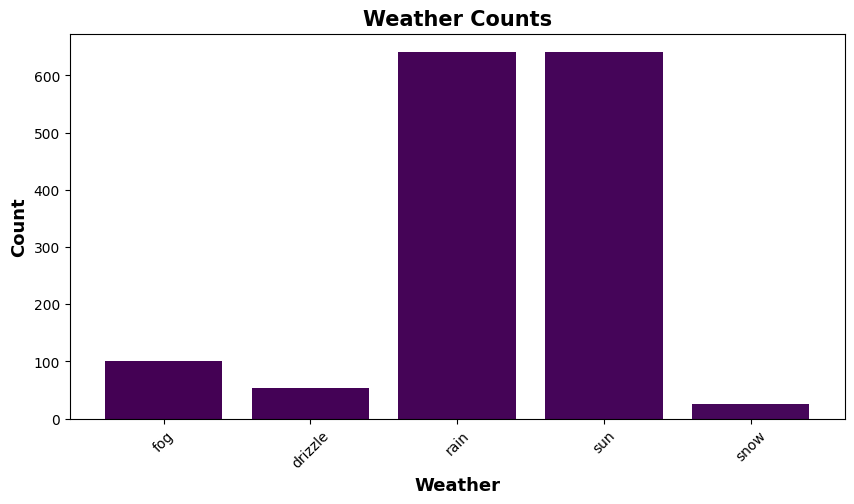

In [ ]:
# Group by 'weather' column and count the occurrences of each type of weather
weather_counts = df.groupBy('weather').count()

# Collect the data to the driver node
weather_counts_collected = weather_counts.collect()

# Convert the collected data to a format suitable for plotting
weather_labels = [row['weather'] for row in weather_counts_collected]
weather_counts_values = [row['count'] for row in weather_counts_collected]

# Plot the data using matplotlib
plt.figure(figsize=(10, 5))
plt.bar(weather_labels, weather_counts_values, color=plt.cm.viridis(range(len(weather_labels))))
plt.xlabel("Weather", fontweight='bold', size=13)
plt.ylabel("Count", fontweight='bold', size=13)
plt.xticks(rotation=45)
plt.title("Weather Counts", fontweight='bold', size=15)
plt.show()

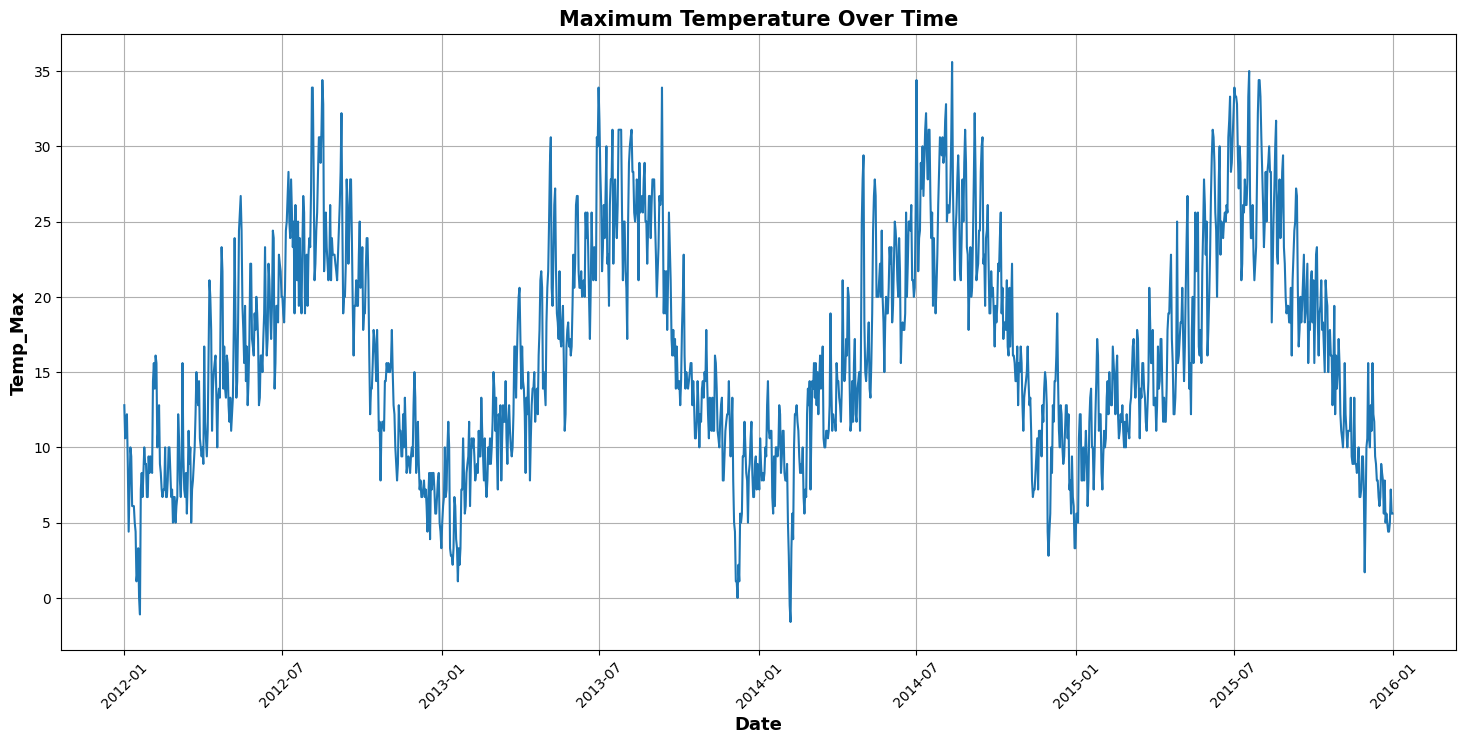

In [ ]:
# Collect the data to the driver node
data_collected = df.select('date', 'temp_max').orderBy('date').collect()

# Convert the collected data to a format suitable for plotting
dates = [row['date'] for row in data_collected]
temp_max_values = [row['temp_max'] for row in data_collected]

# Plot the data using matplotlib
plt.figure(figsize=(18, 8))
plt.plot(dates, temp_max_values, linestyle='-')
plt.xlabel("Date", fontweight='bold', size=13)
plt.ylabel("Temp_Max", fontweight='bold', size=13)
plt.title("Maximum Temperature Over Time", fontweight='bold', size=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

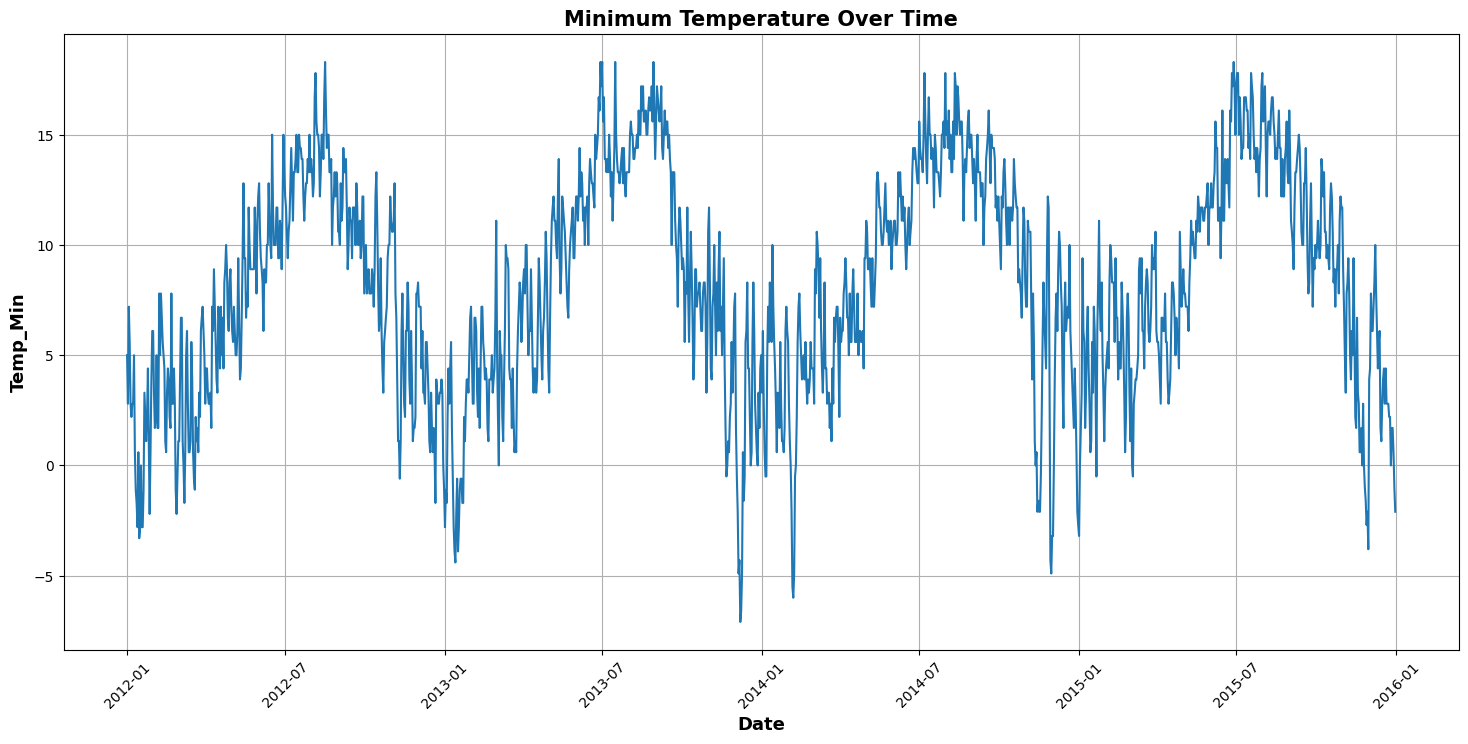

In [ ]:
# Collect the data to the driver node
data_collected = df.select('date', 'temp_min').orderBy('date').collect()

# Convert the collected data to a format suitable for plotting
dates = [row['date'] for row in data_collected]
temp_min_values = [row['temp_min'] for row in data_collected]

# Plot the data using matplotlib
plt.figure(figsize=(18, 8))
plt.plot(dates, temp_min_values, linestyle='-')
plt.xlabel("Date", fontweight='bold', size=13)
plt.ylabel("Temp_Min", fontweight='bold', size=13)
plt.title("Minimum Temperature Over Time", fontweight='bold', size=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

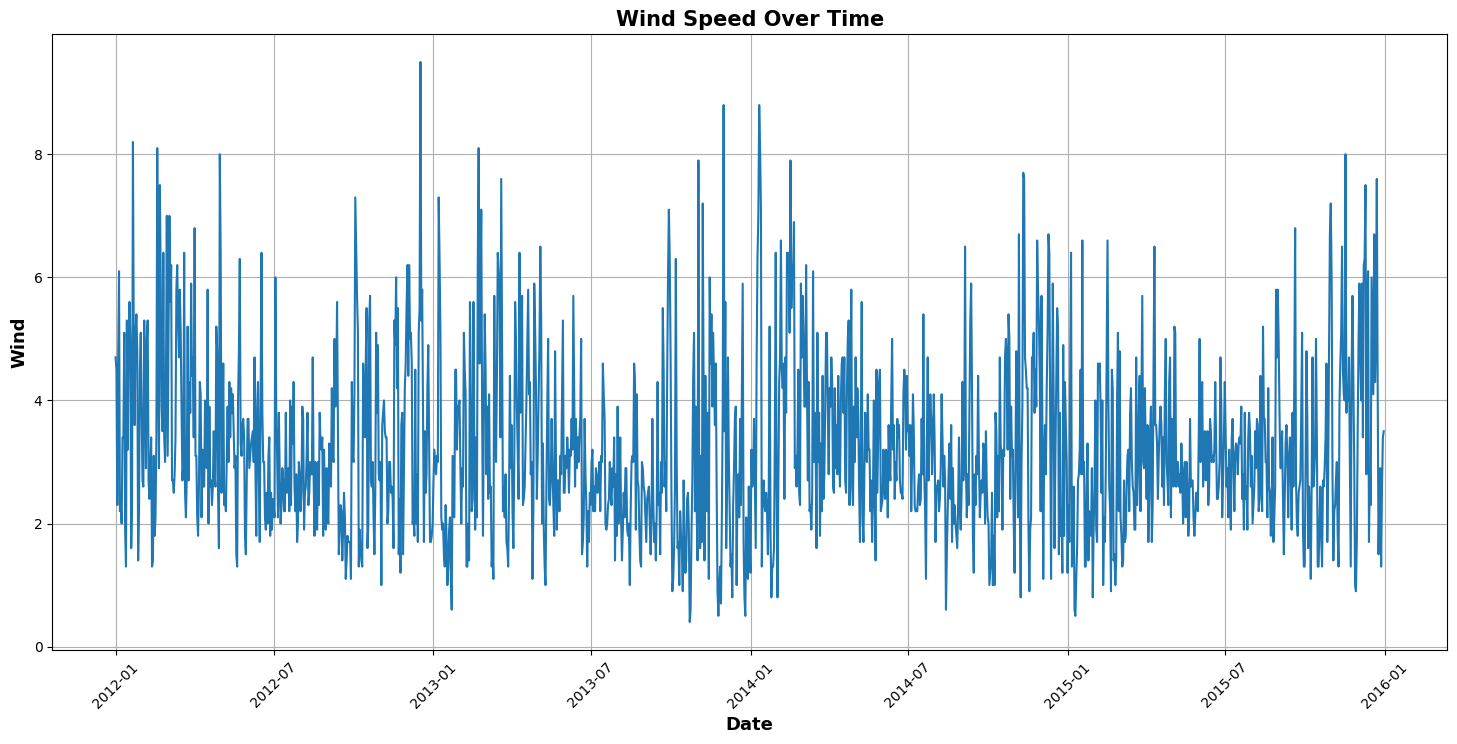

In [ ]:
# Collect the data to the driver node
data_collected = df.select('date', 'wind').orderBy('date').collect()

# Convert the collected data to a format suitable for plotting
dates = [row['date'] for row in data_collected]
wind_values = [row['wind'] for row in data_collected]

# Plot the data using matplotlib
plt.figure(figsize=(18, 8))
plt.plot(dates, wind_values, linestyle='-')
plt.xlabel("Date", fontweight='bold', size=13)
plt.ylabel("Wind", fontweight='bold', size=13)
plt.title("Wind Speed Over Time", fontweight='bold', size=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Tiền xử lý dữ liệu

In [ ]:
# Import các thư viện cần thiết
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, to_date, year, month, dayofmonth, mean
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler




In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

# Drop rows with any missing values
df_cleaned = df.dropna()

# Convert categorical variables into numerical values
categorical_cols = ['weather']
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index").fit(df_cleaned) for col in categorical_cols]
encoder = OneHotEncoder(inputCols=[f"{col}_index" for col in categorical_cols],
                        outputCols=[f"{col}_encoded" for col in categorical_cols])

# Assemble features
feature_cols = ['precipitation', 'temp_max', 'temp_min', 'wind', 'weather_encoded']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Create pipeline
pipeline = Pipeline(stages=indexers + [encoder, assembler])

# Fit and transform data
pipeline_model = pipeline.fit(df_cleaned)
transformed_data = pipeline_model.transform(df_cleaned)

# Select features and label
data = transformed_data.select("features", "weather_index")



# Sort the data by date
sorted_data = data.sort("date")

# Calculate the split index based on the desired ratio
split_index = int(sorted_data.count() * 0.7)  # 70% training, 30% testing

# Split the data into training and testing sets
train_data = sorted_data.limit(split_index)
test_data = sorted_data.subtract(train_data)


# Define X_train, X_test, y_train, y_test
X_train = train_data.select("features")
y_train = train_data.select("weather_index")
X_test = test_data.select("features")
y_test = test_data.select("weather_index")


In [ ]:
y_test.show(truncate=False)



weather_mapping = dict(zip(indexers[0].labels, indexers[0].transform(df_cleaned).select('weather_index').distinct().rdd.map(lambda r: r[0]).collect()))

# Invert the dictionary to get numerical index as key and weather as value
weather_mapping_inverted = {index: weather for weather, index in weather_mapping.items()}

# Print the corrected mapping
print("Weather Index Mapping:")
for index, weather in sorted(weather_mapping_inverted.items()):
    print(f"{index}: {weather}")





+-------------+
|weather_index|
+-------------+
|1.0          |
|0.0          |
|0.0          |
|0.0          |
|1.0          |
|1.0          |
|1.0          |
|1.0          |
|0.0          |
|1.0          |
|1.0          |
|0.0          |
|2.0          |
|1.0          |
|1.0          |
|0.0          |
|0.0          |
|2.0          |
|0.0          |
|1.0          |
+-------------+
only showing top 20 rows

Weather Index Mapping:
0.0: rain
1.0: sun
2.0: snow
3.0: drizzle
4.0: fog


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
X_test.show(truncate=False)

+-----------------------------------+
|features                           |
+-----------------------------------+
|(8,[1,2,3,5],[27.2,13.9,2.4,1.0])  |
|[5.3,7.2,3.9,1.8,1.0,0.0,0.0,0.0]  |
|[0.5,17.8,12.8,5.0,1.0,0.0,0.0,0.0]|
|[0.5,23.9,13.3,3.2,1.0,0.0,0.0,0.0]|
|(8,[1,2,3,5],[7.2,-2.7,1.0,1.0])   |
|(8,[1,2,3,5],[25.0,15.0,2.9,1.0])  |
|(8,[1,2,3,5],[24.4,13.9,3.0,1.0])  |
|(8,[1,2,3,5],[3.3,-2.1,3.6,1.0])   |
|[1.0,13.9,6.1,3.0,1.0,0.0,0.0,0.0] |
|(8,[1,2,3,5],[11.7,5.6,6.5,1.0])   |
|(8,[1,2,3,5],[25.6,11.1,3.0,1.0])  |
|[0.3,17.2,12.2,2.6,1.0,0.0,0.0,0.0]|
|(8,[1,2,3,6],[6.1,0.6,2.8,1.0])    |
|(8,[1,2,3,5],[17.2,6.1,1.7,1.0])   |
|(8,[1,2,3,5],[15.6,11.1,3.0,1.0])  |
|[29.5,13.3,6.7,8.0,1.0,0.0,0.0,0.0]|
|[1.0,16.1,11.7,4.7,1.0,0.0,0.0,0.0]|
|(8,[1,2,3,6],[12.8,5.6,1.0,1.0])   |
|[9.4,11.7,7.8,1.4,1.0,0.0,0.0,0.0] |
|(8,[1,2,3,5],[16.7,2.8,2.4,1.0])   |
+-----------------------------------+
only showing top 20 rows



## KNN

In [ ]:
from pyspark.sql import Row
from math import sqrt
from operator import itemgetter

# Repartition the RDDs to increase the number of partitions
num_partitions = 4  # Adjust this number based on your cluster size

# Convert DataFrame rows to tuples without collecting
train_tuples_rdd = X_train.rdd.map(lambda row: tuple(row.features.toArray()))
train_labels_rdd = y_train.rdd.map(lambda row: row.weather_index)

train_tuples_rdd = train_tuples_rdd.repartition(num_partitions)
train_labels_rdd = train_labels_rdd.repartition(num_partitions)

# Check the number of partitions again
print("Number of partitions in train_tuples_rdd after repartition:", train_tuples_rdd.getNumPartitions())
print("Number of partitions in train_labels_rdd after repartition:", train_labels_rdd.getNumPartitions())

# Collect the data to the driver
train_tuples = train_tuples_rdd.collect()
train_labels = train_labels_rdd.collect()





Number of partitions in train_tuples_rdd after repartition: 4
Number of partitions in train_labels_rdd after repartition: 4


In [ ]:
# Define a function to predict labels for test data
def knn_predict(test_point, k):
    distances = []
    for i, train_point in enumerate(train_tuples):
        distance = euclidean_distance(test_point, train_point)
        distances.append((i, distance))
    distances.sort(key=itemgetter(1))
    neighbors = [train_labels[i] for i, _ in distances[:k]]
    return max(set(neighbors), key=neighbors.count)

# Predict labels for test data
k = 5  # Number of neighbors
test_predictions_rdd = X_test.rdd.map(lambda row: knn_predict(tuple(row.features.toArray()), k))

# Compare predictions with actual labels
test_labels_rdd = y_test.rdd.map(lambda row: row.weather_index)

# Combine test predictions and actual labels
combined_rdd = test_predictions_rdd.zip(test_labels_rdd)

# Calculate number of correct predictions
correct_predictions = combined_rdd.map(lambda x: 1 if x[0] == x[1] else 0).reduce(lambda a, b: a + b)

# Calculate accuracy
total_predictions = combined_rdd.count()
accuracy = correct_predictions / total_predictions

print("Test Accuracy:", accuracy)

Test Accuracy: 0.8378995433789954


In [ ]:
# Create 10 input rows for prediction
input_data = [
    [0.0, 10.0, 2.8, 2.0],   # Example 1
    [10.9, 10.6, 2.8, 4.5],  # Example 2
    [0.8, 11.7, 7.2, 2.3],   # Example 3
    [20.3, 12.2, 5.6, 4.7],  # Example 4
    [1.3, 8.9, 2.8, 6.1],    # Example 5
    [2.5, 4.4, 2.2, 2.2],    # Example 6
    [0.0, 7.2, 2.8, 2.3],    # Example 7
    [4.3, 9.4, 5.0, 3.4],    # Example 8
    [1.0, 6.1, 0.6, 3.4],    # Example 9
    [0.0, 6.7, -2.2, 1.4]    # Example 10
]


# Predict labels for input data
input_predictions = [knn_predict(row, k) for row in input_data]

# Display the predicted weather index for each input
for i, pred in enumerate(input_predictions, start=1):
    print(f"Input {i}: Predicted Weather Index = {pred}")



Input 1: Predicted Weather Index = 1.0
Input 2: Predicted Weather Index = 0.0
Input 3: Predicted Weather Index = 0.0
Input 4: Predicted Weather Index = 0.0
Input 5: Predicted Weather Index = 0.0
Input 6: Predicted Weather Index = 0.0
Input 7: Predicted Weather Index = 1.0
Input 8: Predicted Weather Index = 0.0
Input 9: Predicted Weather Index = 0.0
Input 10: Predicted Weather Index = 1.0


Class 1.0: Precision = 0.7729257641921398, Recall = 0.9619565217391305, F1 Score = 0.8571428571428571
Class 0.0: Precision = 0.9183673469387755, Recall = 0.967741935483871, F1 Score = 0.9424083769633509
Class 2.0: Precision = 1.0, Recall = 0.13333333333333333, F1 Score = 0.23529411764705882
Class 3.0: Precision = 0.5, Recall = 0.14285714285714285, F1 Score = 0.22222222222222224
Class 4.0: Precision = 0.3333333333333333, Recall = 1.0, F1 Score = 0.5


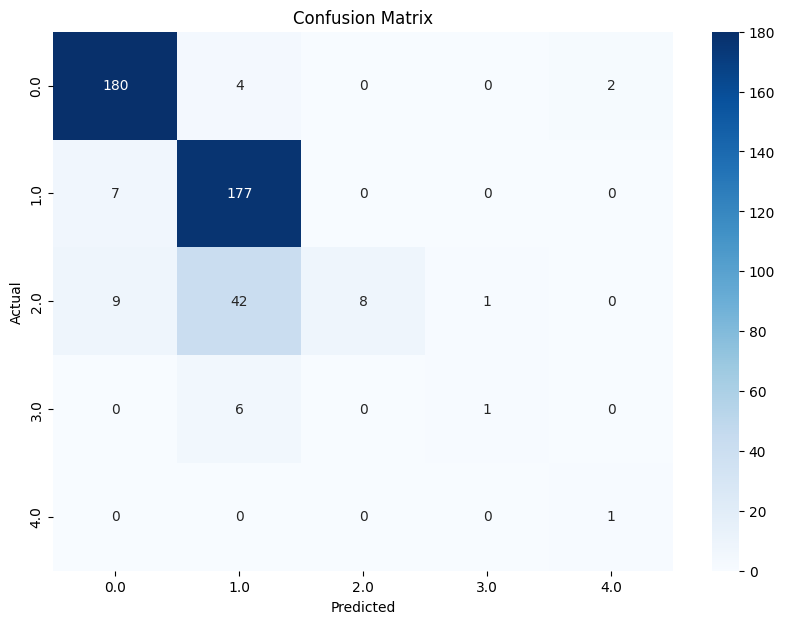

In [ ]:
import seaborn as sns
from collections import defaultdict
# Calculate confusion matrix
confusion_matrix = defaultdict(lambda: defaultdict(int))

for true_label, prediction in zip(test_labels, test_predictions):
    confusion_matrix[true_label][prediction] += 1

# Calculate precision, recall, and F1 score for each class
metrics = {}
for label in confusion_matrix.keys():
    tp = confusion_matrix[label][label]
    fp = sum(confusion_matrix[row][label] for row in confusion_matrix.keys() if row != label)
    fn = sum(confusion_matrix[label][col] for col in confusion_matrix[label].keys() if col != label)

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    metrics[label] = {'precision': precision, 'recall': recall, 'f1': f1}

# Print metrics for each class
for label, metric in metrics.items():
    print(f"Class {label}: Precision = {metric['precision']}, Recall = {metric['recall']}, F1 Score = {metric['f1']}")

# Plot confusion matrix
confusion_matrix_list = [[confusion_matrix[row][col] for col in sorted(confusion_matrix.keys())] for row in sorted(confusion_matrix.keys())]
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_list, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(confusion_matrix.keys()), yticklabels=sorted(confusion_matrix.keys()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()